In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [2]:
#wczytanie i zlaczenie plikow
allFiles = ['dane.csv', 'dane2.csv', 'dane3.csv']
data = []
for f in allFiles:
    df = pd.read_csv(f, sep=';')
    data.append(df)
frame = pd.merge(data[0], data[1], on='Data')
frame = pd.merge(frame, data[2], on='Data')

In [3]:
#zmiana nazw kolumn
columns = { 'Data' : 'date', 'poziom wody w piezometrze B1 npm [cm]': 'waterlv',
            'temperatura wody w piezometrze B1 [C]': 'watertemp',
            'poziom morza': 'sealv',
            'Opady' : 'precip', 'Temperatura powietrza [C]': 'temp',
            'Prędkość wiatru' : 'vwind', 'Kierunek wiatru' : 'dwind' }
frame = frame[list(columns.keys())].rename(columns=columns)

In [4]:
frame[0:3]

,date,waterlv,watertemp,sealv,precip,temp,vwind,dwind
0,2008-09-23,67.21,12.57,493.50,0.0,12.13,3.88,66.25
1,2008-09-24,66.29,12.56,490.67,0.0,10.86,4.50,53.75
2,2008-09-25,65.21,12.54,486.67,0.0,10.05,2.63,30.00


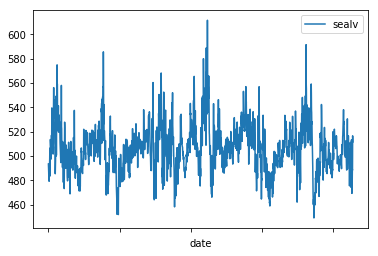

In [5]:
#wykres zmiany poziomu morza w czasie
frame.plot(x='date', y='sealv')

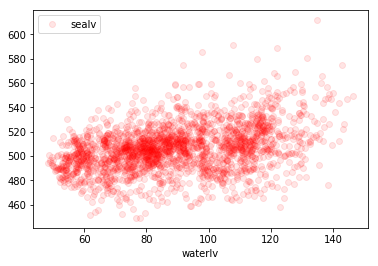

In [6]:
#wykres poziom wody w piezometrze w stosunku do poziomu wody w morzu
frame.plot(x='waterlv', y='sealv', style='ro', alpha=0.1)

In [7]:
#zamiana kolumny z datami na typ datetime
frame['date'] = pd.to_datetime(frame['date'])
print (frame['date'].dtype)
frame.set_index(frame["date"],inplace=True)
#suma poziomu wody w piezometrze dla miesiecy
df1 = frame['waterlv'].resample('M', how='sum')

datetime64[ns]


/home/agnieszka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


In [8]:
#zamiana wartosci kierunku wiatru w stopniach na symbole
def wiatr(angle):
    if angle <= 22.5:
        return 'N'
    elif angle > 22.5 and angle <= 67.5:
        return 'NE'
    elif angle > 67.5 and angle <= 112.5:
        return 'E'
    elif angle > 112.5 and angle <= 157.5:
        return 'SE'
    elif angle > 157.5 and angle <= 202.5:
        return 'S'
    elif angle > 202.5 and angle <= 247.5:
        return 'SW'
    elif angle > 247.5 and angle <= 292.5:
        return 'W'
    elif angle > 292.5 and angle <= 337.5:
        return 'NW'
    else:
        return 'N'
    
frame['wind'] = frame['dwind'].apply(wiatr)

In [9]:
frame[0:10]

,date,waterlv,watertemp,sealv,precip,temp,vwind,dwind,wind
date,,,,,,,,,
2008-09-23,2008-09-23,67.21,12.57,493.50,0.0,12.13,3.88,66.25,NE
2008-09-24,2008-09-24,66.29,12.56,490.67,0.0,10.86,4.50,53.75,NE
2008-09-25,2008-09-25,65.21,12.54,486.67,0.0,10.05,2.63,30.00,NE
2008-09-26,2008-09-26,64.33,12.53,481.00,0.0,9.54,1.88,212.50,SW
2008-09-27,2008-09-27,63.40,12.51,480.67,0.0,13.00,6.63,242.50,SW
2008-09-28,2008-09-28,62.59,12.49,479.33,0.9,13.15,7.75,255.00,W
2008-09-29,2008-09-29,61.62,12.47,493.00,5.7,10.96,6.13,240.00,SW
2008-09-30,2008-09-30,61.48,12.44,492.00,2.4,10.29,6.13,207.50,SW
2008-10-01,2008-10-01,61.23,12.42,493.50,9.6,11.06,9.25,213.75,SW


In [10]:
#tworzenie kolumn z wartosciami opadow od 1 do 5 dni wstecz
def precip_before(date, days_count):
    key = date - timedelta(days=days_count)
    if key in frame.index:
        return frame.loc[key]['precip']
    else:
        return None
    
for i in range(1,6):
    frame['precip'+ str(i)] = frame['date'].apply(lambda x : precip_before(x, i))

In [11]:
#tworzenie kolumny z suma opadow 5 dni wstecz
try:
    frame['precipsum']=frame.iloc[:,9:14].sum(axis=1)
except:
    None
        

In [12]:
frame[0:10]

,date,waterlv,watertemp,sealv,precip,temp,vwind,dwind,wind,precip1,precip2,precip3,precip4,precip5,precipsum
date,,,,,,,,,,,,,,,
2008-09-23,2008-09-23,67.21,12.57,493.50,0.0,12.13,3.88,66.25,NE,NaN,NaN,NaN,NaN,NaN,0.0
2008-09-24,2008-09-24,66.29,12.56,490.67,0.0,10.86,4.50,53.75,NE,0.0,NaN,NaN,NaN,NaN,0.0
2008-09-25,2008-09-25,65.21,12.54,486.67,0.0,10.05,2.63,30.00,NE,0.0,0.0,NaN,NaN,NaN,0.0
2008-09-26,2008-09-26,64.33,12.53,481.00,0.0,9.54,1.88,212.50,SW,0.0,0.0,0.0,NaN,NaN,0.0
2008-09-27,2008-09-27,63.40,12.51,480.67,0.0,13.00,6.63,242.50,SW,0.0,0.0,0.0,0.0,NaN,0.0
2008-09-28,2008-09-28,62.59,12.49,479.33,0.9,13.15,7.75,255.00,W,0.0,0.0,0.0,0.0,0.0,0.0
2008-09-29,2008-09-29,61.62,12.47,493.00,5.7,10.96,6.13,240.00,SW,0.9,0.0,0.0,0.0,0.0,0.9
2008-09-30,2008-09-30,61.48,12.44,492.00,2.4,10.29,6.13,207.50,SW,5.7,0.9,0.0,0.0,0.0,6.6
2008-10-01,2008-10-01,61.23,12.42,493.50,9.6,11.06,9.25,213.75,SW,2.4,5.7,0.9,0.0,0.0,9.0


In [13]:
#tworzenie kolumny ze srednia temperatura dla 5 dni wstecz
def mean_temp5(date):
    tlist = []
    for i in range(1,6):
        key = date - timedelta(days=i)
        if key in frame.index:
            tlist.append(frame.loc[key]['temp'])
        else:
            return None
    return np.mean(tlist)

frame['meantemp'] = frame['date'].apply(mean_temp5)

In [14]:
frame[0:10]

,date,waterlv,watertemp,sealv,precip,temp,vwind,dwind,wind,precip1,precip2,precip3,precip4,precip5,precipsum,meantemp
date,,,,,,,,,,,,,,,,
2008-09-23,2008-09-23,67.21,12.57,493.50,0.0,12.13,3.88,66.25,NE,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2008-09-24,2008-09-24,66.29,12.56,490.67,0.0,10.86,4.50,53.75,NE,0.0,NaN,NaN,NaN,NaN,0.0,NaN
2008-09-25,2008-09-25,65.21,12.54,486.67,0.0,10.05,2.63,30.00,NE,0.0,0.0,NaN,NaN,NaN,0.0,NaN
2008-09-26,2008-09-26,64.33,12.53,481.00,0.0,9.54,1.88,212.50,SW,0.0,0.0,0.0,NaN,NaN,0.0,NaN
2008-09-27,2008-09-27,63.40,12.51,480.67,0.0,13.00,6.63,242.50,SW,0.0,0.0,0.0,0.0,NaN,0.0,NaN
2008-09-28,2008-09-28,62.59,12.49,479.33,0.9,13.15,7.75,255.00,W,0.0,0.0,0.0,0.0,0.0,0.0,11.116
2008-09-29,2008-09-29,61.62,12.47,493.00,5.7,10.96,6.13,240.00,SW,0.9,0.0,0.0,0.0,0.0,0.9,11.320
2008-09-30,2008-09-30,61.48,12.44,492.00,2.4,10.29,6.13,207.50,SW,5.7,0.9,0.0,0.0,0.0,6.6,11.340
2008-10-01,2008-10-01,61.23,12.42,493.50,9.6,11.06,9.25,213.75,SW,2.4,5.7,0.9,0.0,0.0,9.0,11.388


In [15]:
# usuniecie wierszy z NaN
frame = frame.dropna()
frame[0:10]

,date,waterlv,watertemp,sealv,precip,temp,vwind,dwind,wind,precip1,precip2,precip3,precip4,precip5,precipsum,meantemp
date,,,,,,,,,,,,,,,,
2008-09-28,2008-09-28,62.59,12.49,479.33,0.9,13.15,7.75,255.00,W,0.0,0.0,0.0,0.0,0.0,0.0,11.116
2008-09-29,2008-09-29,61.62,12.47,493.00,5.7,10.96,6.13,240.00,SW,0.9,0.0,0.0,0.0,0.0,0.9,11.320
2008-09-30,2008-09-30,61.48,12.44,492.00,2.4,10.29,6.13,207.50,SW,5.7,0.9,0.0,0.0,0.0,6.6,11.340
2008-10-01,2008-10-01,61.23,12.42,493.50,9.6,11.06,9.25,213.75,SW,2.4,5.7,0.9,0.0,0.0,9.0,11.388
2008-10-02,2008-10-02,61.33,12.40,497.83,0.0,10.30,11.38,220.00,SW,9.6,2.4,5.7,0.9,0.0,18.6,11.692
2008-10-03,2008-10-03,63.72,12.39,506.17,0.2,9.19,7.00,211.25,SW,0.0,9.6,2.4,5.7,0.9,18.6,11.152
2008-10-04,2008-10-04,65.63,12.37,506.50,0.0,8.95,6.38,225.00,SW,0.2,0.0,9.6,2.4,5.7,17.9,10.360
2008-10-05,2008-10-05,66.91,12.35,483.67,0.5,8.83,7.88,198.75,S,0.0,0.2,0.0,9.6,2.4,12.2,9.958
2008-10-06,2008-10-06,67.23,12.33,504.67,0.0,9.70,3.13,237.50,SW,0.5,0.0,0.2,0.0,9.6,10.3,9.666


In [16]:
# zapis do pliku csv
frame.to_csv('result.csv')

Eksploracja

In [17]:
#shape
frame.shape

(2129, 16)

In [18]:
#data types
print(frame.dtypes)

date         datetime64[ns]
waterlv             float64
watertemp           float64
sealv               float64
precip              float64
temp                float64
vwind               float64
dwind               float64
wind                 object
precip1             float64
precip2             float64
precip3             float64
precip4             float64
precip5             float64
precipsum           float64
meantemp            float64
dtype: object


In [19]:
#head
frame.head(15)

,date,waterlv,watertemp,sealv,precip,temp,vwind,dwind,wind,precip1,precip2,precip3,precip4,precip5,precipsum,meantemp
date,,,,,,,,,,,,,,,,
2008-09-28,2008-09-28,62.59,12.49,479.33,0.9,13.15,7.75,255.00,W,0.0,0.0,0.0,0.0,0.0,0.0,11.116
2008-09-29,2008-09-29,61.62,12.47,493.00,5.7,10.96,6.13,240.00,SW,0.9,0.0,0.0,0.0,0.0,0.9,11.320
2008-09-30,2008-09-30,61.48,12.44,492.00,2.4,10.29,6.13,207.50,SW,5.7,0.9,0.0,0.0,0.0,6.6,11.340
2008-10-01,2008-10-01,61.23,12.42,493.50,9.6,11.06,9.25,213.75,SW,2.4,5.7,0.9,0.0,0.0,9.0,11.388
2008-10-02,2008-10-02,61.33,12.40,497.83,0.0,10.30,11.38,220.00,SW,9.6,2.4,5.7,0.9,0.0,18.6,11.692
2008-10-03,2008-10-03,63.72,12.39,506.17,0.2,9.19,7.00,211.25,SW,0.0,9.6,2.4,5.7,0.9,18.6,11.152
2008-10-04,2008-10-04,65.63,12.37,506.50,0.0,8.95,6.38,225.00,SW,0.2,0.0,9.6,2.4,5.7,17.9,10.360
2008-10-05,2008-10-05,66.91,12.35,483.67,0.5,8.83,7.88,198.75,S,0.0,0.2,0.0,9.6,2.4,12.2,9.958
2008-10-06,2008-10-06,67.23,12.33,504.67,0.0,9.70,3.13,237.50,SW,0.5,0.0,0.2,0.0,9.6,10.3,9.666


In [20]:
#descriptions
print(frame.describe())

           waterlv    watertemp        sealv       precip         temp  \
count  2129.000000  2129.000000  2129.000000  2129.000000  2129.000000   
mean     89.282353     9.550714   506.334171     1.905838     7.919333   
std      21.178420     2.011780    19.060688     4.318492     7.436094   
min      48.500000     6.320000   449.270000     0.000000   -16.580000   
25%      73.500000     7.690000   494.330000     0.000000     2.630000   
50%      87.260000     9.330000   506.000000     0.090000     7.590000   
75%     106.910000    11.570000   516.600000     1.700000    13.980000   
max     146.330000    12.800000   611.440000    47.000000    27.810000   

             vwind        dwind      precip1      precip2      precip3  \
count  2129.000000  2129.000000  2129.000000  2129.000000  2129.000000   
mean      4.606801   180.649624     1.909549     1.912607     1.906736   
std       2.243889    70.911251     4.320333     4.321564     4.316912   
min       0.380000    13.750000     0

In [21]:
frame14 = frame[frame.columns.difference(['date', 'wind'])]
framey = frame14[frame14.columns.difference(['waterlv'])]
frame14[0:3]

,dwind,meantemp,precip,precip1,precip2,precip3,precip4,precip5,precipsum,sealv,temp,vwind,waterlv,watertemp
date,,,,,,,,,,,,,,
2008-09-28,255.0,11.116,0.9,0.0,0.0,0.0,0.0,0.0,0.0,479.33,13.15,7.75,62.59,12.49
2008-09-29,240.0,11.320,5.7,0.9,0.0,0.0,0.0,0.0,0.9,493.00,10.96,6.13,61.62,12.47
2008-09-30,207.5,11.340,2.4,5.7,0.9,0.0,0.0,0.0,6.6,492.00,10.29,6.13,61.48,12.44


In [22]:
#correlation
corr = frame.corr(method = 'pearson')
print(corr)

            waterlv  watertemp     sealv    precip      temp     vwind  \
waterlv    1.000000  -0.098659  0.359107  0.005270 -0.337894 -0.000283   
watertemp -0.098659   1.000000  0.341774  0.155111  0.539043 -0.009573   
sealv      0.359107   0.341774  1.000000  0.176834  0.149137  0.053729   
precip     0.005270   0.155111  0.176834  1.000000  0.144730  0.126234   
temp      -0.337894   0.539043  0.149137  0.144730  1.000000  0.026328   
vwind     -0.000283  -0.009573  0.053729  0.126234  0.026328  1.000000   
dwind      0.068600   0.081435  0.158080  0.076639  0.069502  0.357772   
precip1    0.026013   0.157001  0.230579  0.176040  0.116302  0.188780   
precip2    0.058660   0.158838  0.191014  0.095769  0.100086  0.053903   
precip3    0.079909   0.159606  0.173910  0.029291  0.101746  0.012702   
precip4    0.090588   0.159982  0.167553  0.084179  0.109871 -0.016505   
precip5    0.098240   0.162470  0.170070  0.069315  0.111061 -0.024950   
precipsum  0.130997   0.295772  0.3459

/home/agnieszka/.local/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


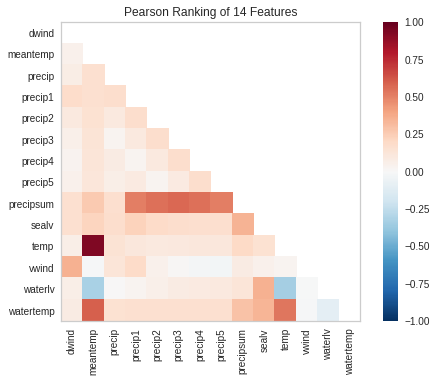

In [23]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(frame14)
visualizer.poof()

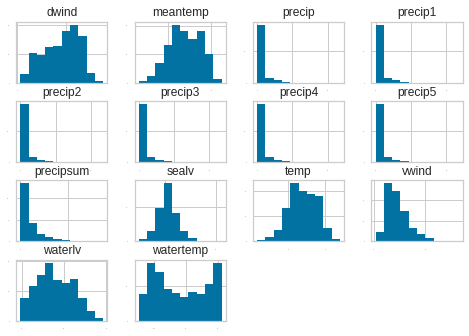

In [24]:
import matplotlib.pyplot as plt
#histograms
frame.hist(sharex = False, sharey = False, xlabelsize = 1, ylabelsize = 1)
plt.show()

In [25]:
import seaborn as sns
#sns.set(style="ticks")

#sns.pairplot(data=frame, kind="reg")

In [26]:
#skewness
skew = frame.skew()
print(skew)

waterlv      0.192278
watertemp    0.136306
sealv        0.428498
precip       4.210356
temp        -0.154314
vwind        1.160223
dwind       -0.320087
precip1      4.203751
precip2      4.198780
precip3      4.211221
precip4      4.211071
precip5      4.206216
precipsum    1.983224
meantemp    -0.150414
dtype: float64


In [27]:
# funkcje wykonujaca transfromacje danych
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import quantile_transform

def yeoJohnson(x):
    pt = PowerTransformer()
    yjs = pt.fit_transform(x)
    df = pd.DataFrame(yjs)
    df.columns = x.columns
    return df

def quantileTransform(x):
    qt = quantile_transform(x)
    df = pd.DataFrame(qt)
    df.columns = x.columns
    return df

yj = yeoJohnson(frame14)
yj[0:3]

quant = quantileTransform(frame14)
quant[0:3]

,dwind,meantemp,precip,precip1,precip2,precip3,precip4,precip5,precipsum,sealv,temp,vwind,waterlv,watertemp
0,0.845345,0.632516,0.683684,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,0.069069,0.707708,0.901902,0.124934,0.938939
1,0.759259,0.639579,0.893894,6.836837e-01,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,2.312312e-01,0.229229,0.627385,0.788789,0.114695,0.935936
2,0.580080,0.640461,0.791291,8.933934e-01,6.836837e-01,1.000000e-07,1.000000e-07,1.000000e-07,5.505506e-01,0.213714,0.600601,0.788789,0.112923,0.931932


dwind       -0.224042
meantemp    -0.152983
precip       0.640983
precip1      0.639891
precip2      0.639062
precip3      0.641183
precip4      0.642504
precip5      0.642594
precipsum   -0.001603
sealv       -0.016625
temp        -0.112746
vwind        0.003624
waterlv     -0.031245
watertemp   -0.009762
dtype: float64


/home/agnieszka/.local/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


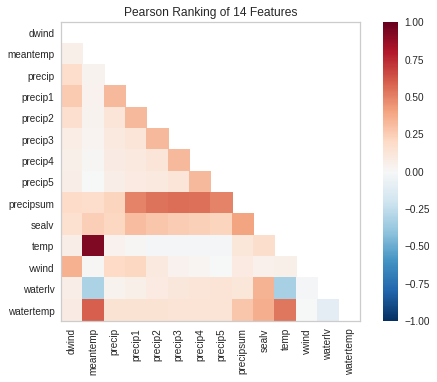

In [28]:
# transformed YeoJohnson skewness and correlation
print(yj.skew())
visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(yj)
visualizer.poof()

dwind        0.000042
meantemp     0.000020
precip      -0.064511
precip1     -0.064541
precip2     -0.064073
precip3     -0.062655
precip4     -0.061379
precip5     -0.060361
precipsum   -0.055915
sealv       -0.000007
temp        -0.000029
vwind        0.000087
waterlv     -0.000019
watertemp   -0.000088
dtype: float64


/home/agnieszka/.local/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


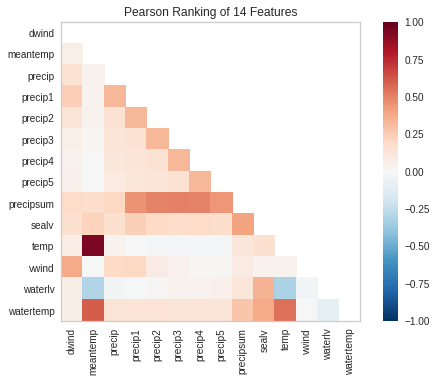

In [29]:
# transformed Quantile Transform skewness and correlation
print(quant.skew())
visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(quant)
visualizer.poof()

In [30]:
#split-out validation dataset
from sklearn.model_selection import train_test_split
array = frame.values
X = array[:, (2,3,4,5,6,7,9,10,11,12,13,14,15)].astype(np.float)
Y = array[:, 1].astype(np.float)
validation_size = 0.20
seed = 7 
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y, test_size = validation_size, random_state = seed)

In [31]:
#split-out after YeoJohnson transformation
tarray = yj.values
Xt = tarray[:, (0,1,2,3,4,5,6,7,8,9,10,11,13)].astype(np.float)
Yt = tarray[:, 12].astype(np.float)
validation_size = 0.20
seed = 7 
Xt_train, Xt_validation, Yt_train, Yt_validation = train_test_split(Xt,Yt, test_size = validation_size, random_state = seed)

In [32]:
#split-out after Quantile Transformer
qarray = quant.values
Xq = qarray[:, (0,1,2,3,4,5,6,7,8,9,10,11,13)].astype(np.float)
Yq = qarray[:, 12].astype(np.float)
validation_size = 0.20
seed = 7 
Xq_train, Xq_validation, Yq_train, Yq_validation = train_test_split(Xq,Yq, test_size = validation_size, random_state = seed)

**Random Forest**

In [54]:
from sklearn.ensemble import RandomForestRegressor
clfreg = RandomForestRegressor(n_estimators=100, max_depth=2,random_state=0)
clfreg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [55]:
np.sqrt(mean_squared_error(Y_train, clfreg.predict(X_train)))

18.127385687055018

In [56]:
np.sqrt(mean_squared_error(Y_validation, clfreg.predict(X_validation)))

18.305977193379352

In [57]:
mean_absolute_error(Y_train, clfreg.predict(X_train))

15.396285753848465

In [58]:
mean_absolute_error(Y_validation, clfreg.predict(X_validation))

15.506104048775594

In [59]:
def evaluation(regressor, X_train, Y_train, X_validation, Y_validation):
    print ("RMSE training set:", np.sqrt(mean_squared_error(Y_train, regressor.predict(X_train))))
    print ("RMSE testing set:", np.sqrt(mean_squared_error(Y_validation, regressor.predict(X_validation))))
    print ("MAE training set:", mean_absolute_error(Y_train, regressor.predict(X_train)))
    print ("MAE testing set:", mean_absolute_error(Y_validation, regressor.predict(X_validation)))
    
    fig, ax = plt.subplots()
    sns.scatterplot(Y_train,regressor.predict(X_train),ax=ax)
    sns.scatterplot(Y_validation,regressor.predict(X_validation))
    

RMSE training set: 18.127385687055018
RMSE testing set: 18.305977193379352
MAE training set: 15.396285753848465
MAE testing set: 15.506104048775594


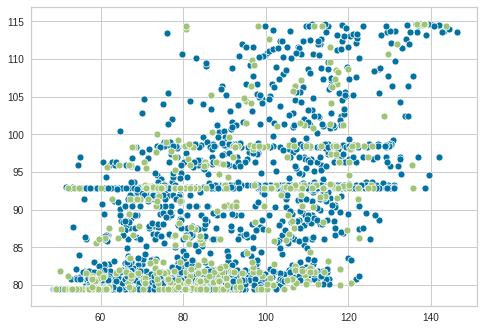

In [60]:
evaluation(clfreg, X_train, Y_train, X_validation, Y_validation)

**Ridge**

In [40]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, Y_train) 
treg = linear_model.Ridge(alpha=.5)
treg.fit(Xt_train, Yt_train) 
qreg = linear_model.Ridge(alpha=.5)
qreg.fit(Xq_train, Yq_train) 

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

RMSE training set: 17.52833643308573
RMSE testing set: 17.671564923103013
MAE training set: 14.83389159279436
MAE testing set: 14.925286060649837


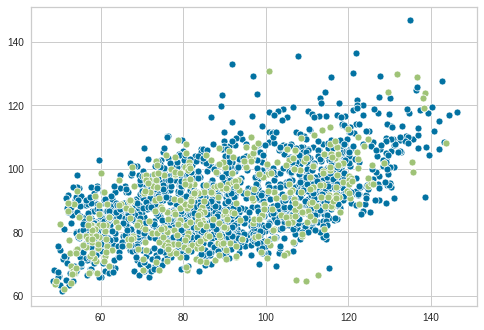

In [41]:
#without transformation
evaluation(reg, X_train, Y_train, X_validation, Y_validation)

RMSE training set: 0.8305095005861769
RMSE testing set: 0.8497960932151043
MAE training set: 0.706946140959976
MAE testing set: 0.7159862059012451


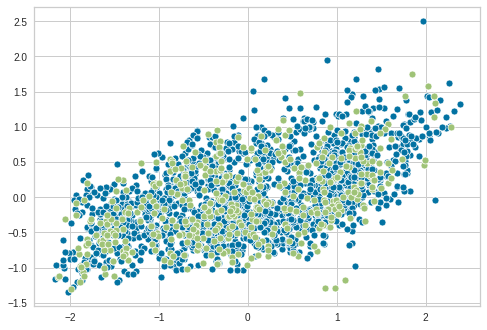

In [42]:
#YeoJohnson
evaluation(treg, Xt_train, Yt_train, Xt_validation, Yt_validation)

RMSE training set: 0.23897476740019136
RMSE testing set: 0.24161572228507197
MAE training set: 0.20605944573853988
MAE testing set: 0.2075028050899838


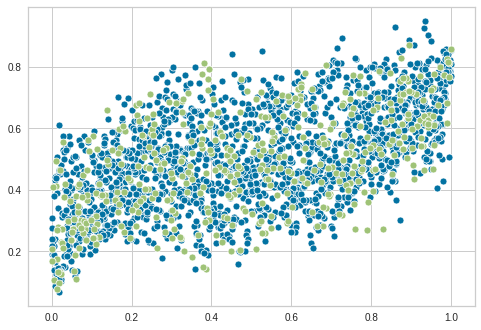

In [43]:
#Quantile Transformer
evaluation(qreg, Xq_train, Yq_train, Xq_validation, Yq_validation)

**Lasso**

In [44]:
las = linear_model.Lasso(alpha=0.1)
las.fit(X_train, Y_train)
tlas = linear_model.Lasso(alpha=0.1)
tlas.fit(Xt_train, Yt_train)
qlas = linear_model.Lasso(alpha=0.1)
qlas.fit(Xq_train, Yq_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

RMSE training set: 17.528598907179028
RMSE testing set: 17.669034828703328
MAE training set: 14.837265485750821
MAE testing set: 14.928300695479026


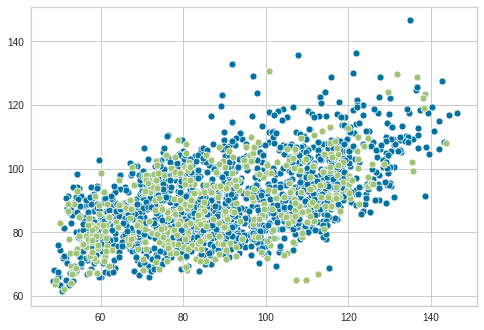

In [45]:
#without transformation
evaluation(las, X_train, Y_train, X_validation, Y_validation)

RMSE training set: 0.855142135004447
RMSE testing set: 0.8662650752015038
MAE training set: 0.726202604147408
MAE testing set: 0.733869662313881


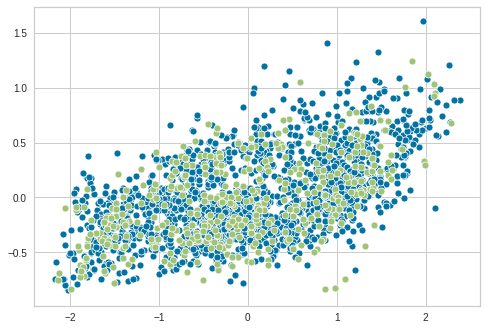

In [46]:
#YeoJohnson
evaluation(tlas, Xt_train, Yt_train, Xt_validation, Yt_validation)

RMSE training set: 0.28858690249992297
RMSE testing set: 0.28986785845148444
MAE training set: 0.2500450809776838
MAE testing set: 0.2504798584506186


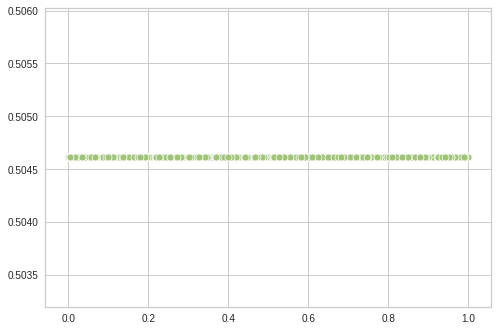

In [47]:
#Quantile Transformer
evaluation(qlas, Xq_train, Yq_train, Xq_validation, Yq_validation)

**Elastic Net**

In [48]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(random_state=0)
en.fit(X_train, Y_train)
ten = ElasticNet(random_state=0)
ten.fit(Xt_train, Yt_train)
qen = ElasticNet(random_state=0)
qen.fit(Xq_train, Yq_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

RMSE training set: 17.535952314580868
RMSE testing set: 17.67248874420855
MAE training set: 14.861656020688375
MAE testing set: 14.954138030190656


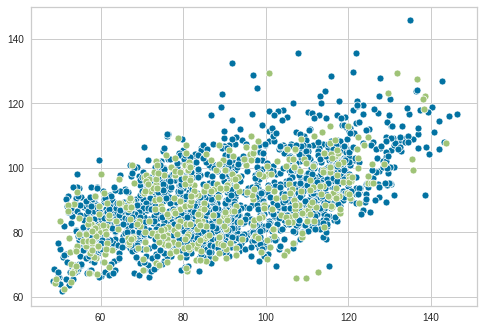

In [49]:
#without transformation
evaluation(en, X_train, Y_train, X_validation, Y_validation)

RMSE training set: 0.9981697610214992
RMSE testing set: 1.0080013022493546
MAE training set: 0.8375858659906961
MAE testing set: 0.8412379255280212


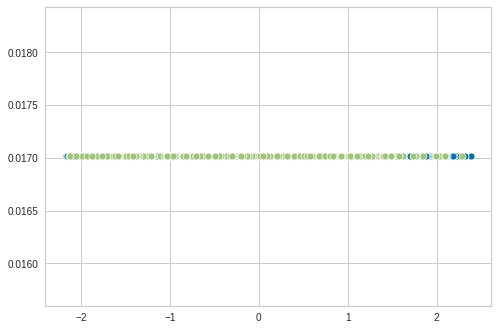

In [50]:
#YeoJohnson
evaluation(ten, Xt_train, Yt_train, Xt_validation, Yt_validation)

RMSE training set: 0.28858690249992297
RMSE testing set: 0.28986785845148444
MAE training set: 0.2500450809776838
MAE testing set: 0.2504798584506186


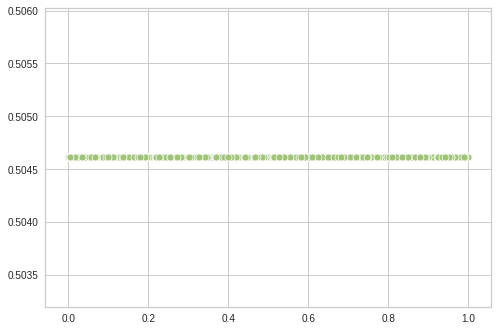

In [51]:
#Quantile Transformer
evaluation(qen, Xq_train, Yq_train, Xq_validation, Yq_validation)

**SVM**

In [52]:
svr = svm.SVR()
svr.fit(X_train, Y_train)
tsvr = svm.SVR()
tsvr.fit(Xt_train, Yt_train)
qsvr = svm.SVR()
qsvr.fit(Xq_train, Yq_train)

NameError: name 'svm' is not defined

In [ ]:
#without transformation
evaluation(svr, X_train, Y_train, X_validation, Y_validation)

In [ ]:
#YeoJohnson
evaluation(tsvr, Xt_train, Yt_train, Xt_validation, Yt_validation)

In [ ]:
#Quantile Transformer
evaluation(qsvr, Xq_train, Yq_train, Xq_validation, Yq_validation)

**Stochastic Gradient**

In [ ]:
from sklearn.linear_model import SGDClassifier
sgr = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
sgr.fit(X_train, Y_train)
tsgr = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
tsgr.fit(Xt_train, Yt_train)
qsgr = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
qsgr.fit(Xq_train, Yq_train)

In [ ]:
#without transformation
evaluation(sgr, X_train, Y_train, X_validation, Y_validation)

In [ ]:
#YeoJohnson
evaluation(tsgr, Xt_train, Yt_train, Xt_validation, Yt_validation)

In [ ]:
#Quantile Transformer
evaluation(qsgr, Xq_train, Yq_train, Xq_validation, Yq_validation)

**Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, Y_train) 
tneigh = KNeighborsRegressor(n_neighbors=2)
tneigh.fit(Xt_train, Yt_train) 
qneigh = KNeighborsRegressor(n_neighbors=2)
qneigh.fit(Xq_train, Yq_train)

In [ ]:
#without transformation
evaluation(neigh, X_train, Y_train, X_validation, Y_validation)

In [ ]:
#YeoJohnson
evaluation(tneigh, Xt_train, Yt_train, Xt_validation, Yt_validation)

In [ ]:
#Quantile Transformer
evaluation(qneigh, Xq_train, Yq_train, Xq_validation, Yq_validation)